# Making lists of nodes and edges with integer numbers

In [93]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
import time

In [69]:
G = nx.nx_agraph.read_dot('./Dataset/LeagueNetwork.dot/LeagueNetwork.dot')

edge_list =[]
for e in G.edges():
    u,v = e
    edge_list.append((int(u), int(v)))

node_list = []
for i in G.nodes():
    node_list.append(int(i))
    
print(len(edge_list))
print(len(node_list))

239
16


# Adjacency List

In [97]:
adjacency_list = {}
for edge in edge_list:
    source, target = edge
    if source not in adjacency_list:
        adjacency_list[source] = []
    adjacency_list[source].append(target)
    # for undirected graph, we also add the reverse edge
    if target not in adjacency_list:
        adjacency_list[target] = []
    adjacency_list[target].append(source)
    
print(adjacency_list)

{1: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 2: [1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 3: [1, 2, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 4: [1, 2, 3, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 5: [1, 2, 3, 4, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 6: [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 7: [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 8, 9, 10, 11, 12, 13, 14, 15, 16], 8: [1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 9, 10, 11, 12, 13, 14, 15, 16], 9: [1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 10, 11, 12, 13, 14, 15, 16], 10: [1, 2, 3, 4, 5, 6, 7

# Assigning random positions to each node

In [98]:
pos = {node: np.random.rand(2) for node in adjacency_list.keys()}
print(pos)

{1: array([0.39161961, 0.95814148]), 2: array([0.8725656 , 0.95831406]), 3: array([0.34551292, 0.273753  ]), 4: array([0.69947327, 0.958119  ]), 5: array([0.25803752, 0.9496655 ]), 6: array([0.41473914, 0.23217559]), 7: array([0.93040143, 0.76452104]), 8: array([0.37061267, 0.54360372]), 9: array([0.82250866, 0.26638447]), 10: array([0.26096076, 0.17996407]), 11: array([0.20120884, 0.94797526]), 12: array([0.50317159, 0.59413688]), 13: array([0.24130447, 0.69002262]), 14: array([0.90180687, 0.65931995]), 15: array([0.18542619, 0.56705039]), 16: array([0.89879277, 0.67409261])}


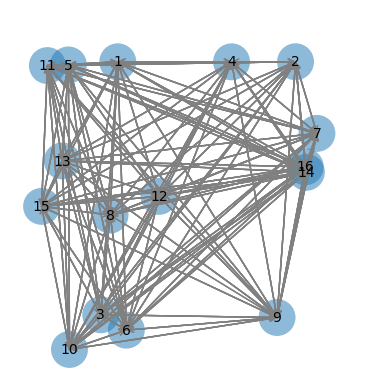

In [99]:
fig, ax = plt.subplots()

for node, position in pos.items():
    circle = Circle(position, radius=0.05, alpha=0.5)
    ax.add_patch(circle)
    plt.text(*position, str(node), size=10, ha='center', va='center')


for source, targets in adjacency_list.items():
    for target in targets:
        edge = ConnectionPatch(pos[source], pos[target], 'data', arrowstyle='->', color='grey')
        ax.add_patch(edge)

ax.set_xlim(0.1, 1.1)
ax.set_ylim(0.1, 1.1)
ax.set_aspect('equal')
plt.axis('off')

plt.show()

# Computational Complexity

## The computational complexity of the layout depends on how we choose to position the nodes. Since we use a random layout like above, the complexity is O(n), where n is the number of nodes.

# Pros: 
## With a custom layout, we have complete control over the positioning of nodes and can tailor the layout to highlight specific features of the graph.

# Cons: 
## It may be difficult to produce a layout that is as optimized or clear as those produced by more sophisticated algorithms. The generated layout has issues like node overlap or too many edge crossings.

<h1 style='color:red'> Bonus (Circular Layout)</h1>

In [86]:
n = len(adjacency_list)
radius = 1
center_x, center_y = 0.5, 0.5  


position = {}
for i, node in enumerate(adjacency_list):
    angle = 2 * np.pi * i / n
    position[node] = (center_x + radius * np.cos(angle), center_y + radius * np.sin(angle))


position

{1: (1.5, 0.5),
 2: (1.4238795325112867, 0.8826834323650898),
 3: (1.2071067811865475, 1.2071067811865475),
 4: (0.8826834323650898, 1.4238795325112867),
 5: (0.5000000000000001, 1.5),
 6: (0.11731656763491027, 1.4238795325112867),
 7: (-0.20710678118654746, 1.2071067811865475),
 8: (-0.42387953251128674, 0.8826834323650898),
 9: (-0.5, 0.5000000000000001),
 10: (-0.42387953251128685, 0.11731656763491033),
 11: (-0.20710678118654768, -0.20710678118654746),
 12: (0.11731656763490966, -0.4238795325112865),
 13: (0.49999999999999983, -0.5),
 14: (0.8826834323650901, -0.4238795325112866),
 15: (1.2071067811865475, -0.20710678118654768),
 16: (1.4238795325112865, 0.11731656763490961)}

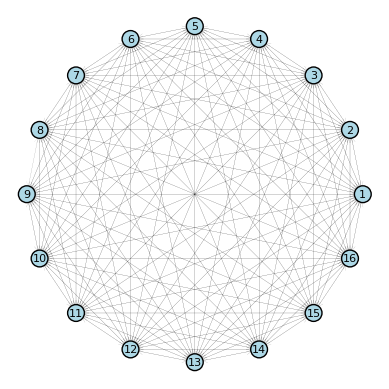

The algorithm took 9.481544733047485 seconds.


In [94]:
start_time = time.time()
fig, ax = plt.subplots()

for source, targets in adjacency_list.items():
    for target in targets:
        if source in position and target in position:  
            edge = ConnectionPatch(position[source], position[target], 'data', 
                                   arrowstyle='->', shrinkA=5, shrinkB=5, zorder=1, edgecolor='black',
                                  alpha=0.3, linewidth=0.1)
            ax.add_patch(edge)
            
for node, (x, y) in position.items():
    ax.add_patch(Circle((x, y), 0.05, zorder=2, edgecolor='black', facecolor='lightblue'))
    plt.text(x, y, str(node), ha='center', va='center', zorder=3, fontsize=8, color='black')


ax.set_xlim(-0.6, 1.6)
ax.set_ylim(-0.6, 1.6)
ax.set_aspect('equal')
plt.axis('off')
plt.show()
end_time = time.time()
print(f"The algorithm took {end_time - start_time} seconds.")